# **1. Import modules & Load dataset**

The first step is to import the modules needed to process the dataset and load the graduation dataset of the students of the **Informatics Engineering Education (Pendidikan Teknik Informatika (PTI))** program from 2014-2017.

## 👉 Import modules

In [50]:
import pandas as pd
import numpy as np

# Graph modules
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn.preprocessing import OneHotEncoder

# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV

# Modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## 👉 Load dataset

In [51]:
# Load graduation dataset from google drive directory
df = pd.read_csv('/content/drive/MyDrive/Repository/On-Time Graduation Prediction Data Analytics and Machine Learning Approaches/Dataset/Graduation.csv')
# Show dataframe of graduation dataset
df.head()

,Student ID,Gender,SHS type,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,mhs0001,Female,SMA,2600000,2000000,2.52,0.00,0.00,0.00,0,Late
1,mhs0002,Male,SMA,2600000,3000000,3.30,3.21,3.44,3.45,0,Late
2,mhs0003,Male,SMA,2600000,2400000,2.30,2.44,3.00,2.88,0,Late
3,mhs0004,Male,SMA,2600000,4000000,3.30,3.46,3.44,3.50,0,Late
4,mhs0005,Male,SMA,3100000,1000000,0.09,0.00,0.00,0.00,0,Late


# **2. Exploratory Data Analysis (EDA)**

Understanding data by performing in-depth data analysis is necessary to prepare quality data that is relevant to the case at hand. Analysis can be done by performing **data identification**, **univariate analysis**, **bivariate analysis**, and **multivariate analysis**.

## 👉 Data identification

This process is an important stage where we explore the data set to be used by identifying the features in the data set, exploring the types of data it contains, and understanding the overall state of the data.

In [52]:
# Show the features of graduation dataset
features = df.keys()
features = pd.DataFrame({'Features of dataset': features})
features

,Features of dataset
0,Student ID
1,Gender
2,SHS type
3,UKT
4,Parents' income
5,IPS 1
6,IPS 2
7,IPS 3
8,IPS 4
9,Retake total


In [53]:
# Show features of categorical data type
categorical = list(df.select_dtypes(['object']).columns)
categorical = pd.DataFrame({'Catgorical data': categorical})
categorical

,Catgorical data
0,Student ID
1,Gender
2,SHS type
3,Graduation status


In [54]:
# Show features of numerical data type
numerical = list(df.select_dtypes(['float64','int64']).columns)
numerical = pd.DataFrame({'Numerical data': numerical})
numerical

,Numerical data
0,UKT
1,Parents' income
2,IPS 1
3,IPS 2
4,IPS 3
5,IPS 4
6,Retake total


In [55]:
# Show features with percentage of missing values
Percentage_of_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'Percentage of missing': Percentage_of_missing})
missing_values

,Percentage of missing
Student ID,0.0
Gender,0.0
SHS type,0.0
UKT,0.0
Parents' income,0.0
IPS 1,0.0
IPS 2,0.0
IPS 3,0.0
IPS 4,0.0
Retake total,0.0


In [56]:
# Show each feature with the data type
info_data = {
    'Column': df.columns,
    'Dtype': df.dtypes
}
info_df = pd.DataFrame(info_data).reset_index(drop=True)
info_df

,Column,Dtype
0,Student ID,object
1,Gender,object
2,SHS type,object
3,UKT,int64
4,Parents' income,int64
5,IPS 1,float64
6,IPS 2,float64
7,IPS 3,float64
8,IPS 4,float64
9,Retake total,int64


In [57]:
# Show duplicate row dataset
duplicate = df.duplicated()
duplicate_row = df[duplicate]
print("Duplicate rows:")
duplicate_row = pd.DataFrame(duplicate_row)
duplicate_row

Duplicate rows:


,Student ID,Gender,SHS type,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status


## 👉 Univariate analysis

Understand individual data variables.

### ⚙ Function for **pie chart**

In [58]:
def plot_pie_chart(column, title):
    count = df[column].value_counts()
    # Define custom colors for the pie chart
    custom_colors = ['salmon','skyblue','olivedrab']
    # Calculate the percentages
    percentages = count / count.sum() * 100

    # Plotting the pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(title, pad=30)
    plt.show()

### 📊 Distribution of **graduation status**

The pie chart below shows the unbalanced distribution of **"on time"** and **"late"** classes in the data. From this visualization, it is clear that the number of students in PTI programs who are unable to complete their studies on time is **very significant**. This can certainly have an impact on the quality of the university or program. Therefore, it is imperative for stakeholders and students to conduct an in-depth evaluation to address this emerging issue.

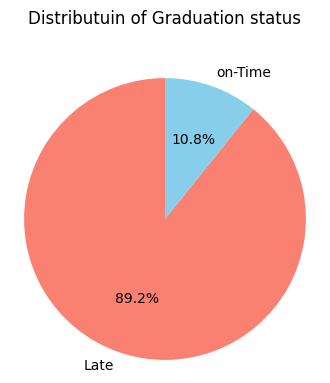

In [59]:
column_distribution = "Graduation status"
# Create a title for the pie chart based on the specified column
title = f'Distributuin of {column_distribution}'
# Call the plot_pie_chart function to create the chart
plot_pie_chart(column_distribution, title)

### 📊 Distribution of **Senior High School** type

In the PTI program, the majority of students come from high school graduates, followed by SMK graduates, while the smallest percentage comes from MA graduates.

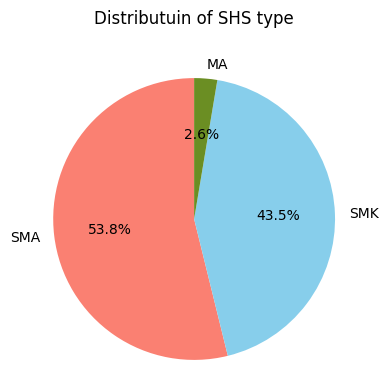

In [60]:
column_distribution = "SHS type"
# Create a title for the pie chart based on the specified column
title = f'Distributuin of {column_distribution}'
# Call the plot_pie_chart function to create the chart
plot_pie_chart(column_distribution, title)

### 📊 Distribution of the **total retake**

Most students in the PTI program do not need to repeat classes in the first four semesters. If repeats are required, the maximum number of repeats is two.

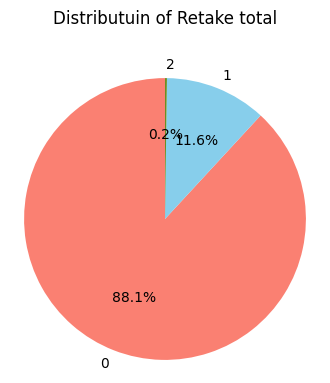

In [61]:
column_distribution = "Retake total"
# Create a title for the pie chart based on the specified column
title = f'Distributuin of {column_distribution}'
# Call the plot_pie_chart function to create the chart
plot_pie_chart(column_distribution, title)

### 📊 **Descriptive statistics** of Numerical data types

In [62]:
# Run descriptive statistics of numerical data types.
df.describe(include = ['float64','int64'])

,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total
count,4.550000e+02,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000
mean,2.554945e+06,3.038146e+06,2.907714,2.907275,2.729033,2.646264,0.120879
std,6.017346e+05,6.623425e+06,0.819438,1.077695,1.155056,1.224540,0.333027
min,5.000000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.400000e+06,1.100000e+06,2.705000,2.580000,2.700000,2.550000,0.000000
50%,2.600000e+06,2.000000e+06,3.040000,3.210000,3.110000,3.110000,0.000000
75%,3.100000e+06,3.550000e+06,3.390000,3.650000,3.440000,3.430000,0.000000
max,3.600000e+06,1.307500e+08,4.000000,4.000000,4.000000,4.000000,2.000000


## 👉 Bivariate & Multivariate analysis

**Bivariate analysis** is an analysis that examines the relationship between two variables, specifically the relationship between the independent variable and the dependent variable (class of data).

Meanwhile, **multivariate analysis** is an analytical process that involves the relationship between three or more variables.

### ⚙ Function for **pie chart with condition** & **grouped bar chart**

In [63]:
def plot_pie_chart_with_condition(data, condition_column, percentage_column, title, axs):
    """
    Plot pie charts for each unique value in a condition column, showing the distribution of a percentage column.

    Parameters:
        - data: DataFrame containing the data to plot
        - condition_column: Name of the column containing conditions/categories
        - percentage_column: Name of the column containing percentages to visualize
        - title: Title of the overall plot
        - axs: List of axes objects to plot each pie chart

    Returns:
        None (plots the pie charts directly on the provided axes)
    """

    # Get unique values in the condition column
    unique_conditions = data[condition_column].unique()
    # Iterate through each unique condition
    for i, condition_value in enumerate(unique_conditions):
        # Filter data for the current condition value
        filtered_data = data[data[condition_column] == condition_value]
        # Count occurrences of each value in the percentage column
        value_counts = filtered_data[percentage_column].value_counts()
        # Calculate percentages
        percentages = (value_counts / value_counts.sum()) * 100
        # Define custom colors for the pie chart
        custom_colors = ['salmon', 'skyblue', 'olivedrab']
        # Plot the pie chart on the specified axis
        axs[i].pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
        # Set title for the pie chart
        axs[i].set_title(f'{percentage_column} by {condition_column} is {condition_value}', fontsize=10, pad=20)

In [64]:
def plot_grouped_bar_chart(data, x_label, y_label, title):
    # Get the number of categories and groups
    num_categories = len(data)
    num_groups = len(data.columns[1:])
    # Define the custom colors for the grouped bars
    custom_colors = ['salmon', 'skyblue', 'olivedrab']
    # Set the width of each bar and the interval between groups
    bar_width = 0.8 / num_groups
    bar_interval = bar_width / num_categories
    # Create the bar positions
    bar_positions = np.arange(num_categories)
    # Plot the grouped bar chart
    plt.figure(figsize=(8, 4))
    for i, category in enumerate(data.columns[1:]):
        plt.bar(bar_positions + (i * bar_width) - ((num_groups - 1) * bar_interval) / 2, data[category], bar_width,
                label=category, color=custom_colors[i])
        # Add data labels to each bar
        for x, y in zip(bar_positions, data[category]):
            plt.text(x + (i * bar_width) - ((num_groups - 1) * bar_interval) / 2, y + 1, str(y), ha='center')
    # Add labels, title, and legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(bar_positions, data[data.columns[0]])
    plt.legend()
    plt.show()

### 📊 Graduation status by **student gender**

Although both male and female students often experience difficulties in completing their studies on time, it is interesting to note that the number of **female students who successfully complete their education on time is higher than that of male students**.

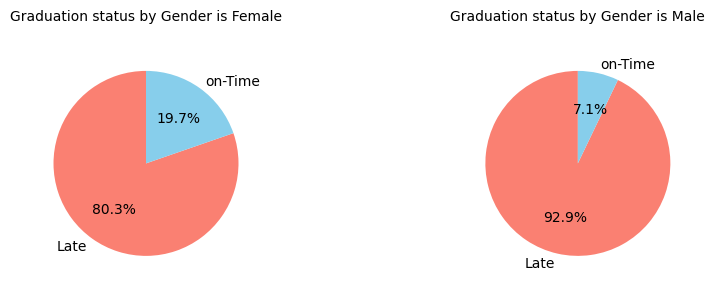

In [65]:
# Create a figure and axis for the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
# Plot pie chart for each gender
plot_pie_chart_with_condition(df, 'Gender', 'Graduation status', 'Graduation status by Gender', axs)
plt.tight_layout()
plt.show()

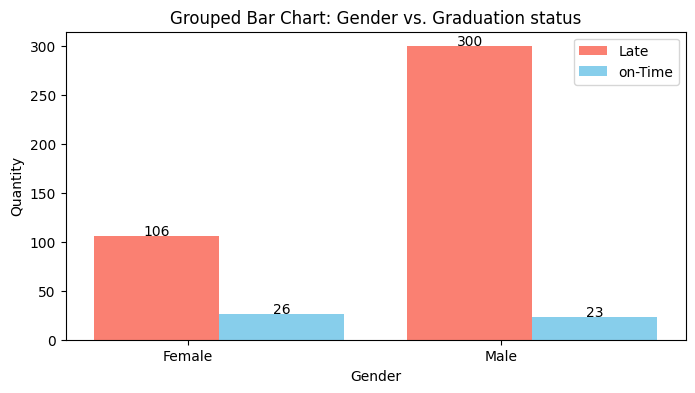

In [66]:
# Extract the required data for visualization
data = df[['Gender', 'Graduation status']]
# Group the data by Gender and Graduation status, and count the number of occurrences
data_grouped = data.groupby(['Gender', 'Graduation status']).size().unstack()
# Reset the index to make the Gender column a regular column
data_grouped = data_grouped.reset_index()
# Define the labels for x-axis, y-axis, and title
x_label = 'Gender'
y_label = 'Quantity'
title = 'Grouped Bar Chart: Gender vs. Graduation status'
# Plot the grouped bar chart using the function with custom colors
plot_grouped_bar_chart(data_grouped, x_label, y_label, title)

### 📊 **IPS average** by student graduation status type

Based on the average IPS data for each semester in the first four semesters, it can be observed that students who are able to graduate on time have an average IPS above 3.30. Meanwhile, students who do not manage to graduate on time tend to have an average IPS below 3.00, with a tendency for the average IPS to decrease over time.

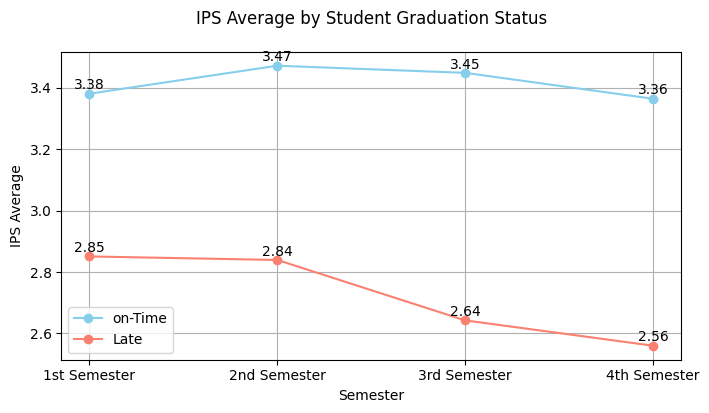

In [67]:
# Calculate the average IPS for on-Time and Late students for each semester
ips_mean_on_time = []
ips_mean_late = []

for i in range(1, 5):
    ips_mean_on_time.append(df[df['Graduation status'] == 'on-Time'][f'IPS {i}'].mean())
    ips_mean_late.append(df[df['Graduation status'] == 'Late'][f'IPS {i}'].mean())

# Semester labels for the plot
semester_labels = ['1st Semester', '2nd Semester', '3rd Semester', '4th Semester']

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(semester_labels, ips_mean_on_time, marker='o', label='on-Time', color='skyblue')
plt.plot(semester_labels, ips_mean_late, marker='o', label='Late', color='salmon')

# Labeling and title
plt.xlabel('Semester')
plt.ylabel('IPS Average')
plt.title('IPS Average by Student Graduation Status', pad=20)
plt.legend()
plt.grid(True)

# Display average values for each semester on the plot
for i, semester in enumerate(semester_labels):
    for j, graduate in enumerate(['on-Time', 'Late']):
        plt.text(semester_labels[i], (ips_mean_on_time[i] if graduate == 'on-Time' else ips_mean_late[i]) + 0.05,
                 f'{ips_mean_on_time[i] if graduate == "on-Time" else ips_mean_late[i]:.2f}',
                 ha='center', va='top')

# Show the plot
plt.show()

### 📊 Graduation status by student **Senior High School (SHS)** type

Students with a vocational background were found to have a higher number of students who completed their studies on time in the PTI program. However, overall, a very large number of students from different educational backgrounds did not manage to complete their studies on time. This is an important illustration for further evaluation and treatment of existing problems.

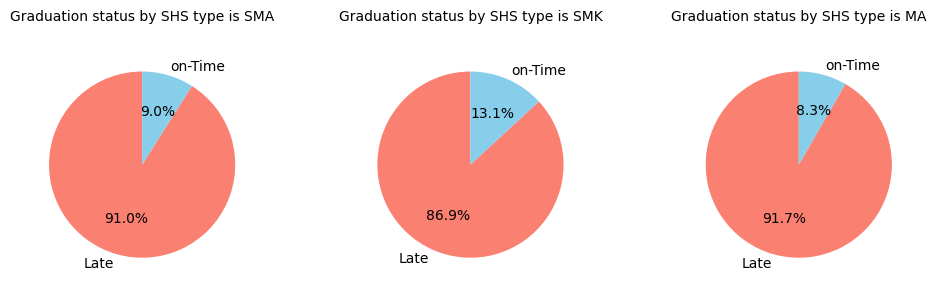

In [68]:
# Create a figure and axis for the subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
# Plot pie chart for each SHS type
plot_pie_chart_with_condition(df, 'SHS type', 'Graduation status', 'Graduation status by SHS type', axs)
plt.tight_layout()
plt.show()

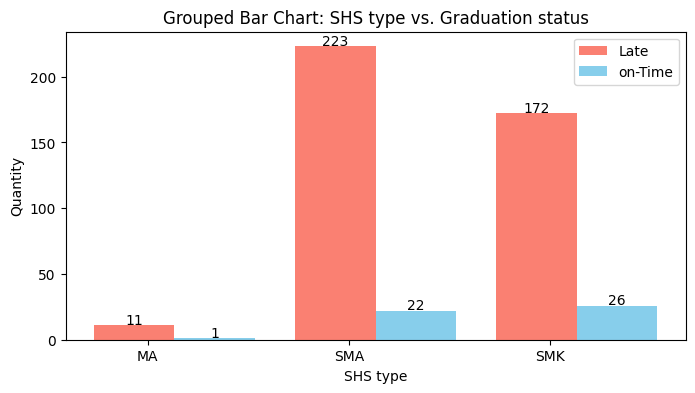

In [69]:
# Extract the required data for visualization
data = df[['SHS type', 'Graduation status']]
# Group the data by SHS type and Graduation status, and count the number of occurrences
data_grouped = data.groupby(['SHS type', 'Graduation status']).size().unstack()
# Reset the index to make the SHS type column a regular column
data_grouped = data_grouped.reset_index()
# Define the labels for x-axis, y-axis, and title
x_label = 'SHS type'
y_label = 'Quantity'
title = 'Grouped Bar Chart: SHS type vs. Graduation status'
# Plot the grouped bar chart using the function with custom colors
plot_grouped_bar_chart(data_grouped, x_label, y_label, title)

### 📊 Graduation status by student **repeat course** total

From the graph below, it is clear that the more often a student repeats a class in the first four semesters, the less likely they are to graduate on time. Conversely, not repeating a class in the first four semesters does not guarantee that a student will graduate on time. This suggests that there are other factors that need to be evaluated and taken into account in supporting students' academic success.

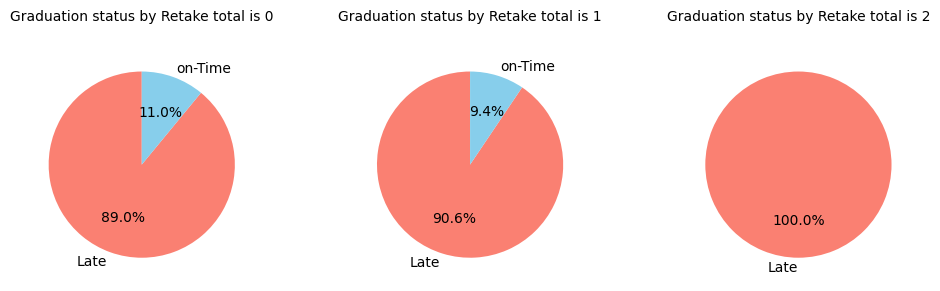

In [70]:
# Create a figure and axis for the subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
# Plot pie chart for each Retake total
plot_pie_chart_with_condition(df, 'Retake total', 'Graduation status', 'Graduation status by Retake total', axs)
plt.tight_layout()
plt.show()

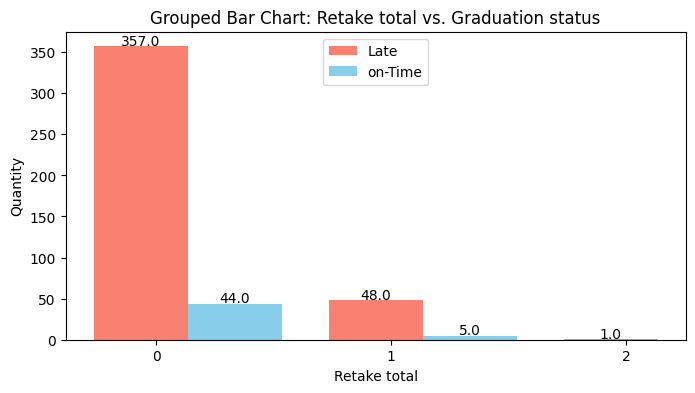

In [71]:
# Extract the required data for visualization
data = df[['Retake total', 'Graduation status']]
# Group the data by Retake total and Graduation status, and count the number of occurrences
data_grouped = data.groupby(['Retake total', 'Graduation status']).size().unstack()
# Reset the index to make the Retake total column a regular column
data_grouped = data_grouped.reset_index()
# Define the labels for x-axis, y-axis, and title
x_label = 'Retake total'
y_label = 'Quantity'
title = 'Grouped Bar Chart: Retake total vs. Graduation status'
# Plot the grouped bar chart using the function with custom colors
plot_grouped_bar_chart(data_grouped, x_label, y_label, title)

### 📊 Graduation status by **IP range** for each semester

⚠ The IPS range is determined based on the number of credits students can take in the next semester.

The observed data show that many students who maintain an average IPS above 3.00 for four consecutive semesters are able to graduate on time. It should be noted, however, that maintaining an average IPS above 3.00 does not guarantee that students will be able to graduate on time. There are many factors that can influence this phenomenon, and this demonstrates the importance of a comprehensive assessment of the various aspects that affect students' academic success.

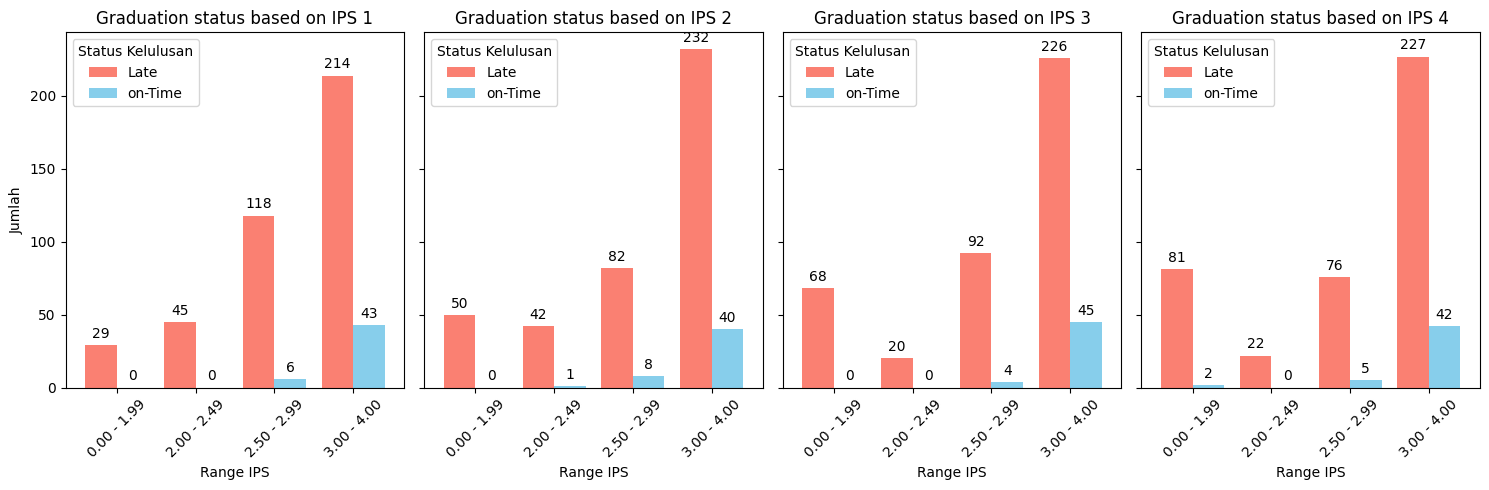

In [72]:
# Function to add labels on top of bars
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Function to get the IPS range
def get_ip_range(ip):
    try:
        ip = float(ip)  # Ensure ip can be converted to float
    except ValueError:
        return 'Unknown'  # Return default value if conversion fails
    # Return IPS range based on the value
    if ip >= 3.00:
        return '3.00 - 4.00'
    elif ip >= 2.50:
        return '2.50 - 2.99'
    elif ip >= 2.00:
        return '2.00 - 2.49'
    else:
        return '0.00 - 1.99'

# Function to create a grouped bar chart for each semester
def plot_grouped_bar_chart(df):
    # Melt DataFrame for IPS and Graduation status
    df_melted = df.melt(id_vars=['Graduation status'], value_vars=['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4'],
                        var_name='Semester', value_name='IPS')

    # Apply the get_ip_range function to create the IP_Range column
    df_melted['IP_Range'] = df_melted['IPS'].apply(get_ip_range)

    # Aggregate data for each semester
    summary_by_semester = df_melted.groupby(['Semester', 'IP_Range', 'Graduation status']).size().unstack(fill_value=0)

    # Define colors for "On-Time" and "Late" statuses
    colors = {'on-Time': 'skyblue', 'Late': 'salmon'}

    # Get list of unique semesters
    semesters = df_melted['Semester'].unique()

    # Create subplots
    fig, axs = plt.subplots(nrows=1, ncols=len(semesters), figsize=(15, 5), sharey=True)

    # Loop through each semester to create a bar chart
    for i, semester in enumerate(semesters):
        data = summary_by_semester.loc[semester]
        ax = axs[i]
        bars = data.plot(kind='bar', ax=ax, color=colors, width=0.8)

        # Add labels for each bar
        autolabel(bars.patches, ax)

        # Set title, axis labels, and legend
        ax.set_title(f'Graduation status based on {semester}')
        ax.set_xlabel('Range IPS')
        ax.set_ylabel('Jumlah')
        ax.set_xticklabels(data.index, rotation=45)
        ax.legend(title='Status Kelulusan')

    # Adjust layout for a cleaner appearance
    plt.tight_layout()
    # Display the plot
    plt.show()

# Use the function to plot the grouped bar chart
plot_grouped_bar_chart(df)

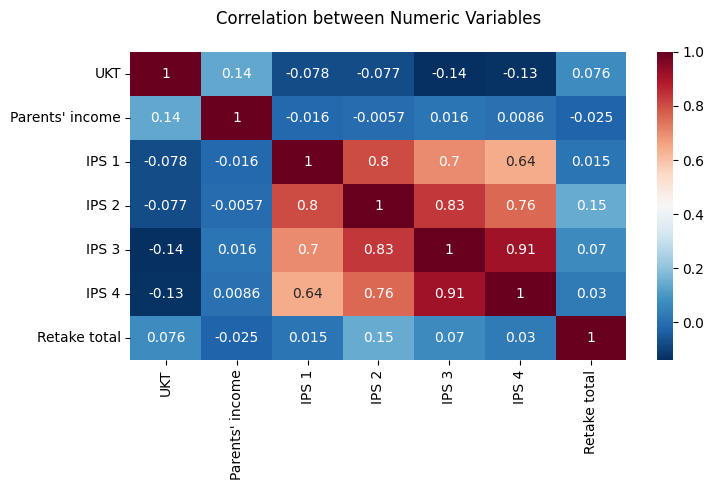

In [73]:
# List of numeric features to be used for correlation calculation
numeric_column = ["UKT","Parents' income","IPS 1","IPS 2","IPS 3", "IPS 4", "Retake total"]
# Calculate the Pearson correlation matrix
corr_pearson = df[numeric_column].corr()
# Create a figure and set its size
plt.figure(figsize=(8, 4))
# Create the heatmap using seaborn
sns.heatmap(corr_pearson, cmap="RdBu_r", annot=True)
# Add a title to the plot
plt.title('Correlation between Numeric Variables', pad=20)
# Display the plot
plt.show()

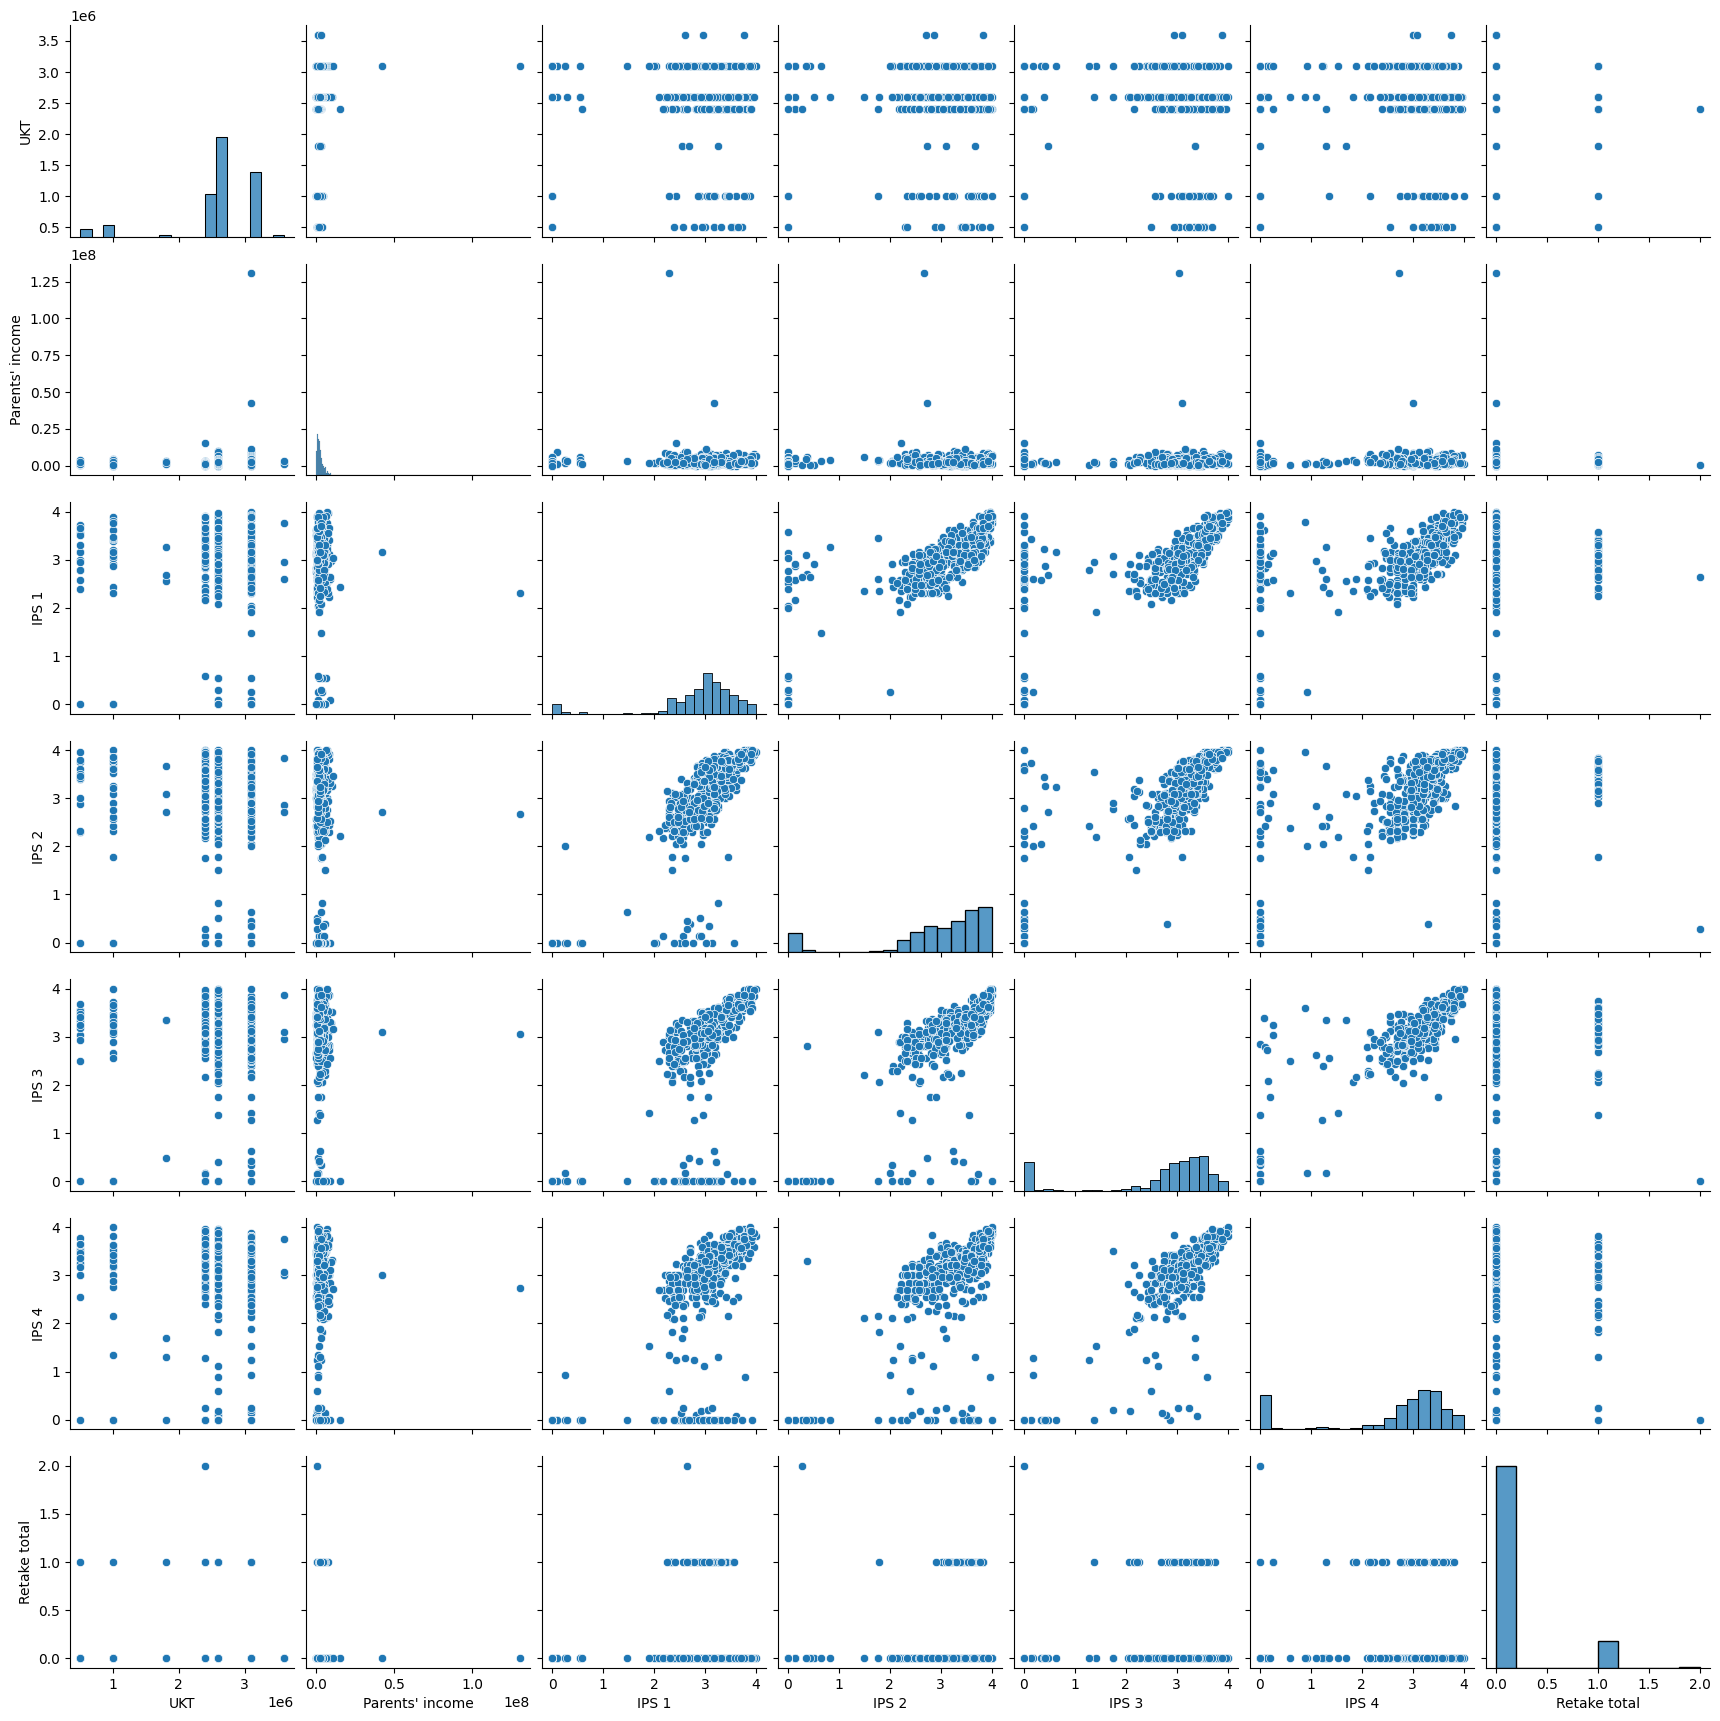

In [74]:
# Create pairplot
"""
This will create a grid of scatterplots showing the pairwise relationships
between variables in the DataFrame df. Each scatterplot in the grid represents
the relationship between two variables,
and the diagonal will show a histogram for each variable.
"""
sns.pairplot(df)

# **3. Feature Encoding**

Feature encoding is the process of converting categorical data types into numerical data types so that they can be processed by machine learning methods.

In this case, the feature encoding method used is

1.   **Gender & SHS style**: One-Hot Encoding
2.   **Graduation status**: Binary Encoding


## 👉 One-hot encoding

In [75]:
# Create an instance of OneHotEncoder
one_enc = OneHotEncoder()

### 📌 For Gender

In [76]:
# Reshape the "Gender" column
x = df["Gender"].values.reshape(-1,1)
# Fit and transform the "Gender" column
fit_gender = one_enc.fit_transform(x).toarray()

In [77]:
# Lets assign the column name to each one hot vector
df_gender = pd.DataFrame(fit_gender,columns=['is_'+str(one_enc.categories_[0][i]) for i in range(len(one_enc.categories_[0]))])
df_gender.head()

,is_Female,is_Male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [78]:
# Concatenate the original df with the df_gender DataFrame along axis=1
df = pd.concat([df_gender, df],axis=1)
# Display the first few rows of the new concatenated DataFrame
df.head()

,is_Female,is_Male,Student ID,Gender,SHS type,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,1.0,0.0,mhs0001,Female,SMA,2600000,2000000,2.52,0.00,0.00,0.00,0,Late
1,0.0,1.0,mhs0002,Male,SMA,2600000,3000000,3.30,3.21,3.44,3.45,0,Late
2,0.0,1.0,mhs0003,Male,SMA,2600000,2400000,2.30,2.44,3.00,2.88,0,Late
3,0.0,1.0,mhs0004,Male,SMA,2600000,4000000,3.30,3.46,3.44,3.50,0,Late
4,0.0,1.0,mhs0005,Male,SMA,3100000,1000000,0.09,0.00,0.00,0.00,0,Late


In [79]:
# Droping the "Gender" column
df.drop("Gender",inplace=True,axis=1)
df.head()

,is_Female,is_Male,Student ID,SHS type,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,1.0,0.0,mhs0001,SMA,2600000,2000000,2.52,0.00,0.00,0.00,0,Late
1,0.0,1.0,mhs0002,SMA,2600000,3000000,3.30,3.21,3.44,3.45,0,Late
2,0.0,1.0,mhs0003,SMA,2600000,2400000,2.30,2.44,3.00,2.88,0,Late
3,0.0,1.0,mhs0004,SMA,2600000,4000000,3.30,3.46,3.44,3.50,0,Late
4,0.0,1.0,mhs0005,SMA,3100000,1000000,0.09,0.00,0.00,0.00,0,Late


### 📌 For SHS type

In [80]:
# Reshape the "SHS type" column
x = df["SHS type"].values.reshape(-1,1)
# Fit and transform the "SHS type" column
fit_SHS_type = one_enc.fit_transform(x).toarray()

In [81]:
# Lets assign the column name to each one hot vector
df_SHS_type = pd.DataFrame(fit_SHS_type,columns=['is_'+str(one_enc.categories_[0][i]) for i in range(len(one_enc.categories_[0]))])
df_SHS_type.head()

,is_MA,is_SMA,is_SMK
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [82]:
# Concatenate the original df with the df_SHS_type DataFrame along axis=1
df = pd.concat([df_SHS_type, df],axis=1)
# Display the first few rows of the new concatenated DataFrame
df.head()

,is_MA,is_SMA,is_SMK,is_Female,is_Male,Student ID,SHS type,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,0.0,1.0,0.0,1.0,0.0,mhs0001,SMA,2600000,2000000,2.52,0.00,0.00,0.00,0,Late
1,0.0,1.0,0.0,0.0,1.0,mhs0002,SMA,2600000,3000000,3.30,3.21,3.44,3.45,0,Late
2,0.0,1.0,0.0,0.0,1.0,mhs0003,SMA,2600000,2400000,2.30,2.44,3.00,2.88,0,Late
3,0.0,1.0,0.0,0.0,1.0,mhs0004,SMA,2600000,4000000,3.30,3.46,3.44,3.50,0,Late
4,0.0,1.0,0.0,0.0,1.0,mhs0005,SMA,3100000,1000000,0.09,0.00,0.00,0.00,0,Late


In [83]:
# Droping the "SHS type" column
df.drop("SHS type",inplace=True,axis=1)
df.head()

,is_MA,is_SMA,is_SMK,is_Female,is_Male,Student ID,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,0.0,1.0,0.0,1.0,0.0,mhs0001,2600000,2000000,2.52,0.00,0.00,0.00,0,Late
1,0.0,1.0,0.0,0.0,1.0,mhs0002,2600000,3000000,3.30,3.21,3.44,3.45,0,Late
2,0.0,1.0,0.0,0.0,1.0,mhs0003,2600000,2400000,2.30,2.44,3.00,2.88,0,Late
3,0.0,1.0,0.0,0.0,1.0,mhs0004,2600000,4000000,3.30,3.46,3.44,3.50,0,Late
4,0.0,1.0,0.0,0.0,1.0,mhs0005,3100000,1000000,0.09,0.00,0.00,0.00,0,Late


## 👉 Label encoding

In [84]:
# Create a mapping dictionary
mapping = {"on-Time" : 1, "Late" : 0}
# Map the values of "Graduation status" column using the mapping dictionary
df["Graduation status"] = df["Graduation status"].map(mapping)
# Display the first 10 rows of the DataFrame
df.head(10)

,is_MA,is_SMA,is_SMK,is_Female,is_Male,Student ID,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,0.0,1.0,0.0,1.0,0.0,mhs0001,2600000,2000000,2.52,0.00,0.00,0.00,0,0
1,0.0,1.0,0.0,0.0,1.0,mhs0002,2600000,3000000,3.30,3.21,3.44,3.45,0,0
2,0.0,1.0,0.0,0.0,1.0,mhs0003,2600000,2400000,2.30,2.44,3.00,2.88,0,0
3,0.0,1.0,0.0,0.0,1.0,mhs0004,2600000,4000000,3.30,3.46,3.44,3.50,0,0
4,0.0,1.0,0.0,0.0,1.0,mhs0005,3100000,1000000,0.09,0.00,0.00,0.00,0,0
5,0.0,0.0,1.0,0.0,1.0,mhs0006,3100000,3800000,3.22,3.25,3.56,3.64,0,0
6,0.0,1.0,0.0,0.0,1.0,mhs0007,3100000,4500000,2.78,2.57,3.00,3.24,0,0
7,0.0,1.0,0.0,0.0,1.0,mhs0008,2600000,2348375,0.00,0.00,0.00,0.00,0,0
8,0.0,0.0,1.0,1.0,0.0,mhs0009,2400000,1500000,3.87,4.00,3.88,3.86,0,0
9,0.0,0.0,1.0,1.0,0.0,mhs0010,2400000,1000000,3.70,3.88,3.88,3.73,0,0


# **4. Data Normalization**

In [85]:
# List of features to be normalized
col_norm = ["UKT","Parents' income","IPS 1","IPS 2","IPS 3","IPS 4","Retake total"]

In [86]:
print("Minimum values:")
# Get the minimum values for each feature
dict_min = df[col_norm].min().to_dict()
# Create a DataFrame to display the minimum values
dict_mins = pd.DataFrame(dict_min, index=['Minimum Value'])
dict_mins

Minimum values:


,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total
Minimum Value,500000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
print("Maximum values:")
# Get the maximum values for each feature
dict_max = df[col_norm].max().to_dict()
# Create a DataFrame to display the maximum values
dict_maxs = pd.DataFrame(dict_max, index=['Maximum Value'])
dict_maxs

Maximum values:


,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total
Maximum Value,3600000.0,130750000.0,4.0,4.0,4.0,4.0,2.0


In [88]:
def normalize(df, dict_min, dict_max, decimal_places=2):
    """
    Normalize the specified columns in the DataFrame using the provided minimum and maximum values.

    Parameters:
        - df: DataFrame to normalize
        - dict_min: Dictionary containing the minimum values for each column to normalize
        - dict_max: Dictionary containing the maximum values for each column to normalize
        - decimal_places: Number of decimal places to round the normalized values (default is 2)

    Returns:
        - Normalized DataFrame
    """
    for key in dict_min.keys():
        df[key] = round((df[key] - dict_min[key]) / (dict_max[key] - dict_min[key]), decimal_places)
    return df

In [89]:
# Call the 'normalize' function on the 'df' DataFrame
df_final = normalize(df, dict_min, dict_max, decimal_places=3)
df_final.head()

,is_MA,is_SMA,is_SMK,is_Female,is_Male,Student ID,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,0.0,1.0,0.0,1.0,0.0,mhs0001,0.677,0.015,0.630,0.000,0.00,0.000,0.0,0
1,0.0,1.0,0.0,0.0,1.0,mhs0002,0.677,0.023,0.825,0.802,0.86,0.862,0.0,0
2,0.0,1.0,0.0,0.0,1.0,mhs0003,0.677,0.018,0.575,0.610,0.75,0.720,0.0,0
3,0.0,1.0,0.0,0.0,1.0,mhs0004,0.677,0.031,0.825,0.865,0.86,0.875,0.0,0
4,0.0,1.0,0.0,0.0,1.0,mhs0005,0.839,0.008,0.022,0.000,0.00,0.000,0.0,0


## 📧 Save normalized graduation dataset

In [90]:
# Specify the path where you want to save the CSV file
csv_file_path = '/content/drive/MyDrive/Repository/On-Time Graduation Prediction Data Analytics and Machine Learning Approaches/Dataset/Graduation_final.csv'
# Save the DataFrame to a CSV file
df_final.to_csv(csv_file_path, index=False)
print(f"DataFrame saved to: {csv_file_path}")

DataFrame saved to: /content/drive/MyDrive/Repository/On-Time Graduation Prediction Data Analytics and Machine Learning Approaches/Dataset/Graduation_final.csv


# **5. Splitting final dataset**

In [91]:
# Features (X): Drop "Student ID" and "Graduation status" columns
X = df_final.drop(["Student ID", "Graduation status"], axis=1)
# Target variable (y): "Graduation status" column
y = df_final["Graduation status"]
# Student IDs (id): "Student ID" column
id = df_final["Student ID"]

# Printing the shape of X and y to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
# Displaying the first few rows of X, y, and id for verification
print("\nFirst few rows of X:")
print(X.head())
print("\nFirst few rows of y:")
print(y.head())
print("\nFirst few rows of id:")
print(id.head())

Shape of X: (455, 12)
Shape of y: (455,)

First few rows of X:
   is_MA  is_SMA  is_SMK  is_Female  is_Male    UKT  Parents' income  IPS 1  \
0    0.0     1.0     0.0        1.0      0.0  0.677            0.015  0.630   
1    0.0     1.0     0.0        0.0      1.0  0.677            0.023  0.825   
2    0.0     1.0     0.0        0.0      1.0  0.677            0.018  0.575   
3    0.0     1.0     0.0        0.0      1.0  0.677            0.031  0.825   
4    0.0     1.0     0.0        0.0      1.0  0.839            0.008  0.022   

   IPS 2  IPS 3  IPS 4  Retake total  
0  0.000   0.00  0.000           0.0  
1  0.802   0.86  0.862           0.0  
2  0.610   0.75  0.720           0.0  
3  0.865   0.86  0.875           0.0  
4  0.000   0.00  0.000           0.0  

First few rows of y:
0    0
1    0
2    0
3    0
4    0
Name: Graduation status, dtype: int64

First few rows of id:
0    mhs0001
1    mhs0002
2    mhs0003
3    mhs0004
4    mhs0005
Name: Student ID, dtype: object


In [92]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, id, test_size=0.20, random_state=42)

# Printing the shapes of the resulting sets for verification
print("Shapes after splitting:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("id_train shape:", id_train.shape)
print("id_test shape:", id_test.shape)

Shapes after splitting:
X_train shape: (364, 12)
X_test shape: (91, 12)
y_train shape: (364,)
y_test shape: (91,)
id_train shape: (364,)
id_test shape: (91,)


In [93]:
X_train.head()

,is_MA,is_SMA,is_SMK,is_Female,is_Male,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total
24,0.0,1.0,0.0,0.0,1.0,0.677,0.031,0.642,0.642,0.620,0.705,0.0
17,0.0,1.0,0.0,1.0,0.0,0.613,0.005,0.608,0.610,0.778,0.810,0.0
66,0.0,0.0,1.0,0.0,1.0,0.839,0.012,0.685,0.572,0.750,0.750,0.0
304,0.0,1.0,0.0,0.0,1.0,0.677,0.005,0.838,0.958,0.875,0.882,0.0
253,0.0,0.0,1.0,1.0,0.0,0.677,0.014,0.875,0.938,0.860,0.805,0.0


In [94]:
X_test.head()

,is_MA,is_SMA,is_SMK,is_Female,is_Male,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total
302,0.0,1.0,0.0,0.0,1.0,0.677,0.023,0.822,0.972,0.868,0.702,0.0
39,0.0,1.0,0.0,0.0,1.0,0.677,0.019,0.772,0.740,0.715,0.750,0.0
393,0.0,0.0,1.0,1.0,0.0,0.677,0.011,0.750,0.885,0.798,0.790,0.5
411,0.0,1.0,0.0,0.0,1.0,0.839,0.032,0.838,0.945,0.828,0.830,0.0
155,0.0,0.0,1.0,0.0,1.0,0.677,0.008,0.695,0.642,0.702,0.750,0.0


# **6. Hyperparameter tuning**

Hyperparameter tuning, especially when employed with the Decision Tree algorithm through tools like GridSearchCV, offers a significant advantage in optimizing model performance. By systematically exploring a range of hyperparameter values, GridSearchCV helps to find the combination that yields the best performance metrics, such as accuracy or F1 score. This process enhances the Decision Tree's ability to generalize patterns in the data, reducing the risk of overfitting or underfitting. Moreover, GridSearchCV automates this search, saving valuable time and effort in manually tweaking hyperparameters. Ultimately, this approach fine-tunes the Decision Tree model to deliver superior results, making it a powerful asset for achieving optimal predictive performance in various machine learning tasks.

In [46]:
# Create copies of the training data for tuning
X_train_tuning, y_train_tuning = X_train.copy(), y_train.copy()

# Create a Decision Tree classifier instance
dt = DecisionTreeClassifier()

# Define the parameters for tuning
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 21, 2).tolist(),
    'min_samples_split': np.arange(2, 11, 2).tolist(),
    'max_leaf_nodes': np.arange(3, 26, 2).tolist()
}

# Perform grid search with cross-validation (cv=10)
model = GridSearchCV(dt, parameters, cv=10, verbose=1)
# Fit the model on the training data for hyperparameter tuning
model.fit(X_train_tuning, y_train_tuning)
# Print the best hyperparameters found
print("Best Hyperparameters:", model.best_params_)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 6}


# **7. Implementation and Evaluation**

In [47]:
def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate the elements of the confusion matrix.

    Parameters:
        - y_true: True labels
        - y_pred: Predicted labels

    Returns:
        - tp: True positives
        - tn: True negatives
        - fp: False positives
        - fn: False negatives
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

In [48]:
# Define the Decision Tree classifier with chosen hyperparameters
clf = DecisionTreeClassifier(criterion=model.best_params_['criterion'],
                           max_depth=model.best_params_['max_depth'],
                           max_leaf_nodes=model.best_params_['max_leaf_nodes'],
                           min_samples_split=model.best_params_['min_samples_split']
                           )

In [49]:
# Train the Decision Tree classifier
clf.fit(X_train, y_train)

# Evaluate the model on the test set and create a confusion matrix
y_pred = clf.predict(X_test)

# Calculate the confusion matrix elements
tp, tn, fp, fn = calculate_confusion_matrix(y_test, y_pred)

# Print the counts of True Positives, True Negatives, False Positives, False Negatives
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Create a table for the confusion matrix
confusion_table = pd.DataFrame(
    {'Predicted 0': [tn, fn], 'Predicted 1': [fp, tp]},
    index=['Actual 0', 'Actual 1']
)
print("\nConfusion Matrix:")
print(confusion_table)

# Calculate accuracy
accuracy = ((tp + tn) / (tp + tn + fp + fn))
print('Accuracy Score: {:.2f}%'.format(accuracy * 100))

# Calculate recall (sensitivity)
all_actual_positive = tp + fn
recall = (tp / all_actual_positive)
print('Recall (Sensitivity) Score: {:.2f}%'.format(recall * 100))

# Calculate precision
all_predicted_positives = tp + fp
precision = (tp / all_predicted_positives)
print('Precision Score: {:.2f}%'.format(precision * 100))

# Calculate F1-score
f1 = ((2 * precision * recall) / (precision + recall))
print('F1-Score: {:.2f}%'.format(f1 * 100))

True Positives (TP): 2
True Negatives (TN): 80
False Positives (FP): 4
False Negatives (FN): 5

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           80            4
Actual 1            5            2
Accuracy Score: 90.11%
Recall (Sensitivity) Score: 28.57%
Precision Score: 33.33%
F1-Score: 30.77%
